In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow_datasets as tfds 

In [2]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

tokenizer = info.features["text"].encoder

train_data, test_data = imdb["train"], imdb["test"]


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete92PMIX/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete92PMIX/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete92PMIX/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
size = 10000
batch_size = 256

train_dataset = train_data.shuffle(size)

train_dataset = train_dataset.padded_batch(batch_size)
test_dataset = test_data.padded_batch(batch_size)


In [4]:
embedding_dims=64
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dims),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), 
                             tf.keras.layers.Dense(64, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


num_epochs = 10

history = model.fit(train_dataset, 
                    epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 73s 639ms/step - loss: 0.6037 - accuracy: 0.6634 - val_loss: 0.4586 - val_accuracy: 0.8013
Epoch 2/10
98/98 [==============================] - 61s 619ms/step - loss: 0.3512 - accuracy: 0.8583 - val_loss: 0.4148 - val_accuracy: 0.8184
Epoch 3/10
98/98 [==============================] - 61s 616ms/step - loss: 0.2836 - accuracy: 0.8908 - val_loss: 0.4766 - val_accuracy: 0.7939
Epoch 4/10
98/98 [==============================] - 61s 616ms/step - loss: 0.2440 - accuracy: 0.9084 - val_loss: 0.4027 - val_accuracy: 0.8378
Epoch 5/10
98/98 [==============================] - 61s 618ms/step - loss: 0.1886 - accuracy: 0.9322 - val_loss: 0.4220 - val_accuracy: 0.8258
Epoch 6/10
98/98 [==============================] - 61s 614ms/step - loss: 0.4052 - accuracy: 0.8182 - val_loss: 0.4536 - val_accuracy: 0.8220
Epoch 7/10
98/98 [==============================] - 61s 614ms/step - loss: 0.3218 - accuracy: 0.8660 - val_loss: 0.4510 - val_accuracy: 0.8379

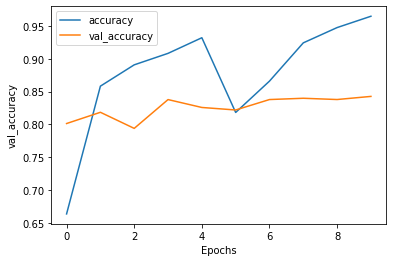

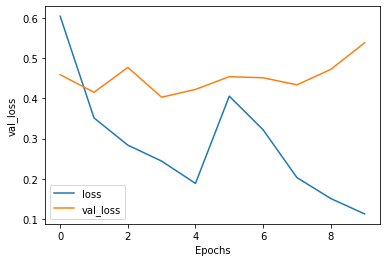

In [7]:
import matplotlib.pyplot as plt 
def plot_graph(history, string): 
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel("val_"+string)
  plt.legend([string, "val_"+string])
  plt.show()

plot_graph(history, "accuracy") 
plot_graph(history, "loss")

In [12]:
embedding_dims=64
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dims),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), 
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(64, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 128)        66048     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-tr

In [14]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]) 

num_epochs = 10

history = model.fit(train_dataset, epochs=num_epochs, validation_data= test_dataset)

Epoch 1/10
98/98 [==============================] - 125s 1s/step - loss: 0.5756 - accuracy: 0.6718 - val_loss: 0.4471 - val_accuracy: 0.8034
Epoch 2/10
98/98 [==============================] - 115s 1s/step - loss: 0.3213 - accuracy: 0.8712 - val_loss: 0.3685 - val_accuracy: 0.8504
Epoch 3/10
98/98 [==============================] - 114s 1s/step - loss: 0.2315 - accuracy: 0.9158 - val_loss: 0.3829 - val_accuracy: 0.8397
Epoch 4/10
98/98 [==============================] - 116s 1s/step - loss: 0.1825 - accuracy: 0.9357 - val_loss: 0.5089 - val_accuracy: 0.8380
Epoch 5/10
98/98 [==============================] - 115s 1s/step - loss: 0.1486 - accuracy: 0.9481 - val_loss: 0.4590 - val_accuracy: 0.8238
Epoch 6/10
98/98 [==============================] - 115s 1s/step - loss: 0.1027 - accuracy: 0.9661 - val_loss: 0.5830 - val_accuracy: 0.8194
Epoch 7/10
98/98 [==============================] - 114s 1s/step - loss: 0.0835 - accuracy: 0.9732 - val_loss: 0.5180 - val_accuracy: 0.8203
Epoch 8/10
98

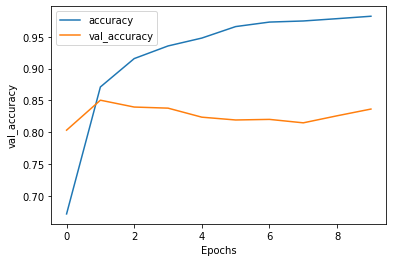

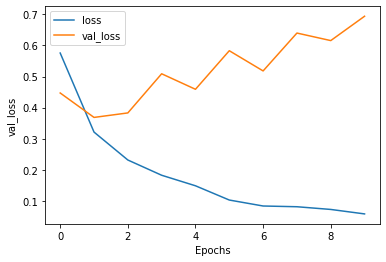

In [15]:
import matplotlib.pyplot as plt 
def plot_graph(history, string): 
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel("val_"+string)
  plt.legend([string, "val_"+string])
  plt.show()

plot_graph(history, "accuracy") 
plot_graph(history, "loss")

In [16]:
embedding_dims=64
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dims),
                             tf.keras.layers.Conv1D(128, 5, activation="relu"), 
                             tf.keras.layers.GlobalMaxPooling1D(),
                             tf.keras.layers.Dense(64, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          523840    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         41088     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
________________________________________________

In [18]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]) 

num_epochs = 10

history = model.fit(train_dataset, epochs=num_epochs, validation_data= test_dataset)

Epoch 1/10
98/98 [==============================] - 65s 574ms/step - loss: 0.6200 - accuracy: 0.6493 - val_loss: 0.4265 - val_accuracy: 0.8104
Epoch 2/10
98/98 [==============================] - 30s 298ms/step - loss: 0.3013 - accuracy: 0.8732 - val_loss: 0.2763 - val_accuracy: 0.8854
Epoch 3/10
98/98 [==============================] - 24s 238ms/step - loss: 0.1590 - accuracy: 0.9431 - val_loss: 0.2592 - val_accuracy: 0.8947
Epoch 4/10
98/98 [==============================] - 23s 227ms/step - loss: 0.0715 - accuracy: 0.9824 - val_loss: 0.2802 - val_accuracy: 0.8940
Epoch 5/10
98/98 [==============================] - 23s 228ms/step - loss: 0.0240 - accuracy: 0.9976 - val_loss: 0.3158 - val_accuracy: 0.8910
Epoch 6/10
98/98 [==============================] - 22s 220ms/step - loss: 0.0084 - accuracy: 0.9997 - val_loss: 0.3407 - val_accuracy: 0.8923
Epoch 7/10
98/98 [==============================] - 21s 207ms/step - loss: 0.0037 - accuracy: 0.9999 - val_loss: 0.3643 - val_accuracy: 0.8930

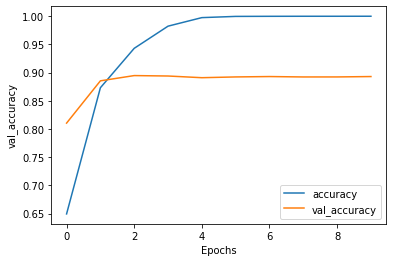

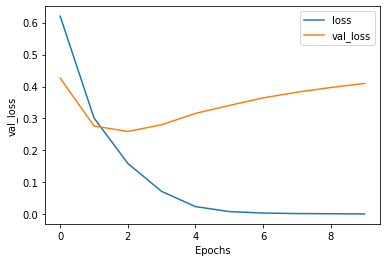

In [19]:
import matplotlib.pyplot as plt 
def plot_graph(history, string): 
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel("val_"+string)
  plt.legend([string, "val_"+string])
  plt.show()

plot_graph(history, "accuracy") 
plot_graph(history, "loss")

In [20]:
#https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C3/W3/ungraded_labs/C3_W3_Lab_5_sarcasm_with_bi_LSTM.ipynb

<h1>GRU</h1>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1L3S5A/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1L3S5A/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1L3S5A/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
{'<OOV>': 1, 'the': 2, 'of': 3, 'and': 4, 'a': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'numpy': 14, 'was': 15, 'as': 16, 'for': 17, 'with': 18, 'movie': 19, 'but': 20, 'film': 21, "'s": 22, 'on': 23, 'you': 24, 'not': 25, 'are': 26, 'his': 27, 'he': 28, 'have': 29, 'be': 30, 'one': 31, 'bound': 32, 'shape': 33, 'string': 34, 'method': 35, 'eagertensorbase': 36, 'tf': 37, 'tensor': 38, 'dtype': 39, 'all': 40, 'at': 41, 'by': 42, 'they': 43, 'an': 44, 'who': 45, 'so': 46, 'from': 47, 'like': 48, 'her': 49, "'t": 50, 'or': 51, 'just': 52, 'there': 53, 'about': 54, 'out': 55, "'": 56, 'has': 57, 'if': 58, 'some': 59, 'what': 60, 'good': 61, 'more': 62, 'very': 63, 'when': 64, 'she': 65, 'up': 66, 'can': 67, 'b': 68, 'time': 69, 'no': 70, 'even': 71, 'my': 72, 'would': 73, 'which': 74, 'story': 75, 'only': 7

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[  32   35   36 ...    1   48 1387]
 [  32   35   36 ... 2519  401   12]
 [  32   35   36 ... 1268    8    8]
 ...
 [  32   35   36 ...  789   54   53]
 [  32   35   36 ...   19   17  111]
 [  32   35   36 ... 8541 1257    6]]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               9600      
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 6)                 390       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169,997
Tr

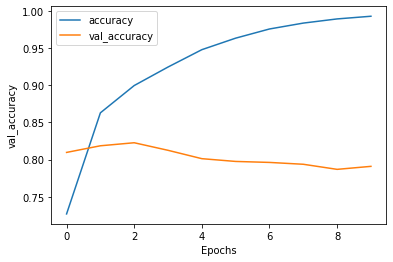

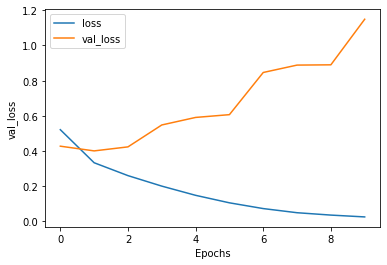

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds 
import numpy as np 
from tensorflow import keras

imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

train_data, test_data = imdb["train"], imdb["test"]

training_sentences=[]
training_labels=[]
testing_sentences=[]
testing_labels=[]

for s,l in train_data:
  training_sentences.append(str(s.numpy))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(str(s.numpy))
  testing_labels.append(l.numpy())

training_label_final = np.array(training_labels)
testing_label_final = np.array(testing_labels)


vocab_size = 10000
max_length = 120
embedding = 16
trunc_type = "post"
oov_tok = "<OOV>"


tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
print(word_index)

sequences = tokenizer.texts_to_sequences(training_sentences)
print(sequences)
padding = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
print(padding)


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
]
)

model.compile(
    loss="binary_crossentropy",
    optimizer = "adam",
    metrics=["accuracy"]
)

model.summary()
num_epochs=10
batch_size = 10

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

history_gru=model.fit(
    padding,
    training_label_final, 
    epochs = num_epochs,
    batch_size=batch_size,
    validation_data = (testing_padded, testing_label_final)
)

'''

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)


reverse_word_index = tokenizer.index_word


import io 

out_v = io.open("vecs.tsv", "w", encoding="utf-8") 
out_m = io.open("meta.tsv", "w", encoding="utf-8") 
for num in range(1, vocab_size):

  word = reverse_word_index[num]
  embedding = weights[num]
  out_m.write(word+"\n")
  out_v.write("\t".join([str(i) for i in embedding])+"\n")

out_v.close()
out_m.close()

'''

plot_graph(history_gru, "accuracy")
plot_graph(history_gru, "loss")
